# Estrazione dei tempi del tambuto dal suono registrato 

Hoo usato due metodi diversi, io non so niente di musica ma un "onset" mi pare sia definito come uno sbalzo del suono

1. Utilizare la funzione `onset_detect` questo ti da i tempi degli on set a partire dal audio

2. Utilizare la funzione `onset_strength` questo misura la forza di ogni onset e poi da questo si possono estrarre i tempi 

Le informazioni musicali e i possibili parmaetri da cambiare possono essere trovati sotto questo link 

https://librosa.org/doc/0.10.1/onset.html

ulteriori possibili funzioni possono essere torvate qui 

https://librosa.org/doc/0.10.1/index.html


Ecco la spiegazione di chat gbt di cos'e' un onset per una persona non musicale come me 

"  In musica, un "onset" si riferisce all'inizio o al punto di partenza di un suono o nota musicale. Rappresenta il momento in cui un suono diventa percettibile o udibile per l'ascoltatore. L'onset segna l'inizio di un evento musicale, che sia il pizzicamento di una corda della chitarra, la percussione di un tasto del pianoforte o l'inizio di una nota cantata da un cantante.

Gli onset sono essenziali in musica per vari motivi:

1. **Ritmo e Tempismo:** Gli onset aiutano a stabilire il ritmo e il tempismo di un pezzo musicale. Forniscono il quadro per battute, misure e frasi musicali.

2. **Articolazione:** Diversi strumenti musicali e tecniche di esecuzione producono caratteristiche di onset diverse, influenzando l'articolazione e l'espressione di una performance musicale.

3. **Analisi e Trascrizione:** Identificare e analizzare gli onset è cruciale per compiti come la trascrizione musicale, lo studio della struttura musicale e l'analisi delle tecniche di esecuzione.

4. **Elaborazione del Segnale:** Gli algoritmi di rilevamento degli onset sono utilizzati nell'elaborazione del segnale audio per identificare automaticamente gli onset degli eventi musicali nelle registrazioni audio. Questi algoritmi svolgono un ruolo significativo in compiti come la trascrizione musicale, il tracciamento dei battiti e la segmentazione audio.

In definitiva, l'onset di un suono musicale rappresenta l'inizio di un evento musicale ed è un concetto fondamentale nella teoria musicale, nell'esecuzione e nell'analisi musicale.
"

In [1]:
from pathlib import Path

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#  NOTE: Questo non e' necessario ma io l'ho usato per senite l'audio per vedere se avevo sbagiato
import sounddevice as sd


In [2]:
# initlaise path objects 
audio_path = Path("audio/Performance.wav")
metronome_path = Path("audio/Metronomo.wav")

# load audio snipets for initial testing
drum_data, drum_sampling_rate = librosa.load(audio_path,sr=100, duration=5)
metronome_data, sampling_rate = librosa.load(metronome_path,sr=100, duration=1)
len(metronome_data)

100

In [3]:
for i in range(len(drum_data)):
    if abs(drum_data[i]) > 0.005:
        print(i)

410
412
443


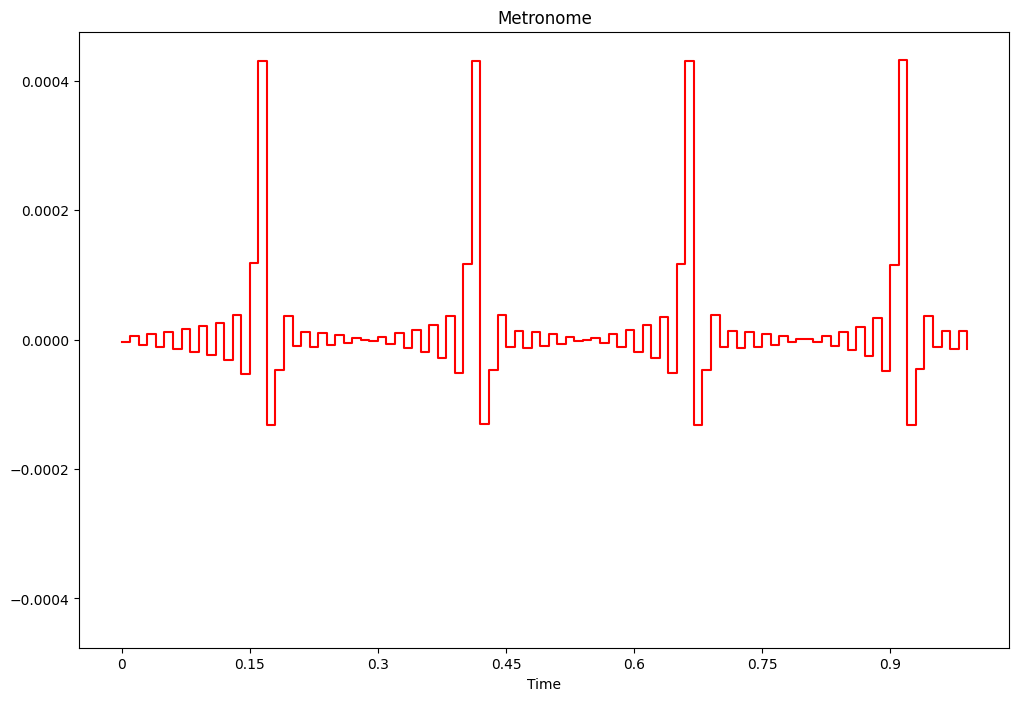

In [4]:
plt.figure(figsize=(12, 8))
librosa.display.waveshow(y=metronome_data, sr=sampling_rate,color='r')
plt.title("Metronome")
plt.show()

In [5]:
# running some basic stuff to figure out what these objects look like
len(metronome_data), metronome_data

(100,
 array([-4.07676544e-06,  6.11210407e-06, -7.65735786e-06,  9.21340052e-06,
        -1.06899815e-05,  1.26249124e-05, -1.42447971e-05,  1.63487857e-05,
        -1.83282900e-05,  2.06742516e-05, -2.32423135e-05,  2.63794973e-05,
        -3.07544651e-05,  3.79742814e-05, -5.32612758e-05,  1.18108008e-04,
         4.30649583e-04, -1.31246430e-04, -4.64956065e-05,  3.68824003e-05,
        -9.18041223e-06,  1.14379045e-05, -1.07531177e-05,  9.78583557e-06,
        -8.25859297e-06,  6.62870207e-06, -4.99974612e-06,  2.75991806e-06,
        -6.57113219e-07, -1.95023631e-06,  4.28590010e-06, -7.05789671e-06,
         9.91818706e-06, -1.25814213e-05,  1.57510094e-05, -1.89877046e-05,
         2.31529302e-05, -2.80453605e-05,  3.59428086e-05, -5.21386573e-05,
         1.17545780e-04,  4.30563523e-04, -1.30860659e-04, -4.72113388e-05,
         3.76078679e-05, -1.08559007e-05,  1.30450626e-05, -1.24872304e-05,
         1.12641628e-05, -1.01670093e-05,  8.47405681e-06, -6.45048794e-06,
      

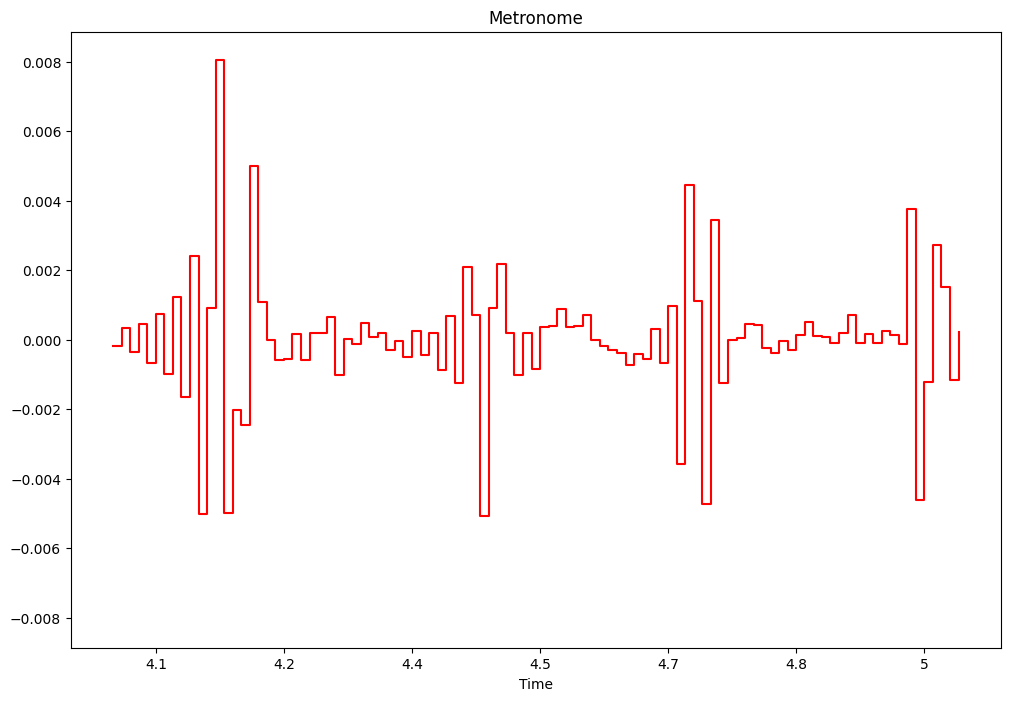

In [6]:
plt.figure(figsize=(12, 8))
librosa.display.waveshow(y=drum_data[400:], sr=drum_sampling_rate,offset=4, color='r')
plt.title("Metronome")
plt.show()

In [7]:
drum_data, drum_sampling_rate = librosa.load(audio_path)
metronome_data, sampling_rate = librosa.load(metronome_path)
drum_beat_times= librosa.onset.onset_detect(y=drum_data, sr=drum_sampling_rate, units='time')
metronome_beat_times = librosa.onset.onset_detect(y=metronome_data, sr=sampling_rate, units='time')

Text(0.5, 1.0, 'Onset Detection')

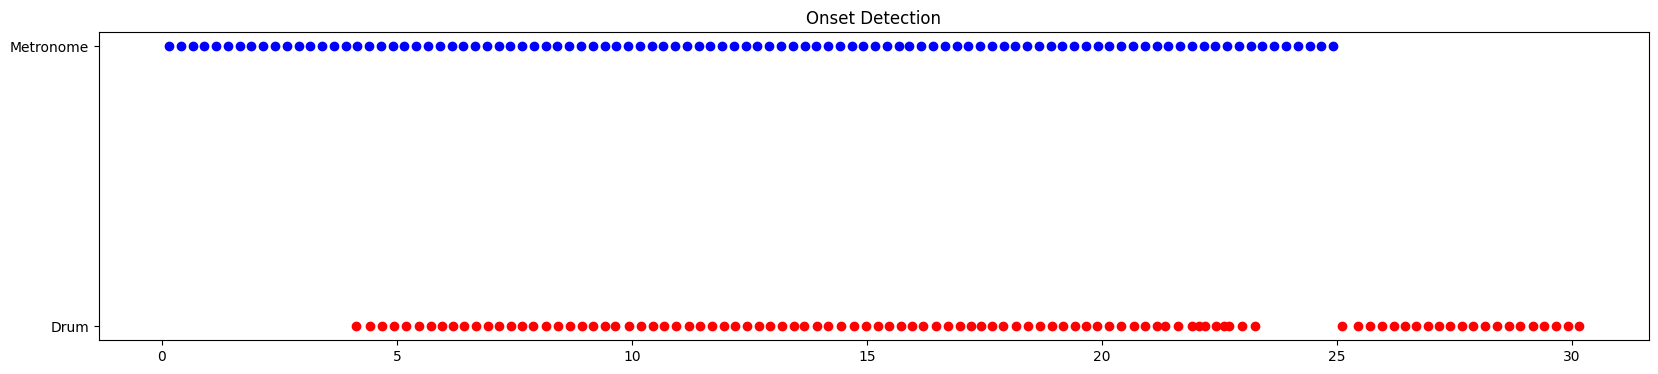

In [8]:
plt.figure(figsize=(20, 4))
plt.scatter(drum_beat_times[:100], np.ones(100), color='r')
plt.scatter(metronome_beat_times[:100], np.ones(100)*2, color='b')
plt.yticks([1, 2], ['Drum', 'Metronome'])
plt.title("Onset Detection")

# Trasformare i tempi misurati in una tabella

1) Adesso prendiamo i tempi misurati e gli trasformiamo in una tablla che contine in una colonna il tempo del suono e nell'altra la diffrenza con il tempo precedente 

In [9]:
#  Removing the start time of the first beat
drum_beat_times = (drum_beat_times-drum_beat_times[0])*10
drum_beat_times = np.round(drum_beat_times, 3)
#  Finding the difference between the beats
diffreneza = np.diff(drum_beat_times)
diffreneza = np.concatenate(([0], diffreneza))

data = pd.DataFrame({'Tempo(ds)':drum_beat_times, 'Difference(ds)':diffreneza})
data.head(10)

,Tempo(ds),Difference(ds)
0,0.000,0.000
1,3.019,3.019
2,5.573,2.554
3,8.127,2.554
4,10.681,2.554
5,13.468,2.787
6,16.022,2.554
7,18.344,2.322
8,20.666,2.322
9,22.988,2.322


In [10]:
metronome_times = (metronome_beat_times - metronome_beat_times[0]) * 10

# Round metronome_times to three decimal places
metronome_times = metronome_times.round(3)

# Calculate differences between consecutive elements of metronome_times
metronomo_diff = np.diff(metronome_times)

# Prepend a zero to metronomo_diff
metronomo_diff = np.concatenate(([0], metronomo_diff))

print(len(metronomo_diff), len(metronome_times))
data = pd.DataFrame({'Tempo(ds)':metronome_times, 'Difference(ds)': metronomo_diff})

350 350


In [46]:
onset_env = librosa.onset.onset_strength(y=drum_data, sr=drum_sampling_rate)
drum_beat_times = librosa.onset.onset_detect(onset_envelope=onset_env, sr=drum_sampling_rate, units='time')
drum_beat_times
time_other, onset_strength = librosa.times_like(onset_env), librosa.util.normalize(onset_env)
other_df = pd.DataFrame({'Times':time_other, 'Onset Strength':onset_strength})
other_df.head(10)

,Times,Onset Strength
0,0.00000,0.000000
1,0.02322,0.000000
2,0.04644,0.000000
3,0.06966,0.002970
4,0.09288,0.000707
5,0.11610,0.000387
6,0.13932,0.000000
7,0.16254,0.000351
8,0.18576,0.000329
9,0.20898,0.000427


In [45]:
# Filter the df to keep only the rows where onset_strength is greater than 0.5
onset_df = other_df[other_df['Onset Strength'] > 0.3]


# NOTE: difffrent methods record the same nuber of beats so the results are reliable 
len(onset_df), len(drum_beat_times)
time_diff = np.diff(onset_df['Times'].values)

In [14]:
#  salva il file in questa folder in un formato leggibile in excell
onset_df.to_csv("onset_df.csv", index=False)

In [15]:
def grafico(df, time_start = 0, time_end = None): 
    plt.figure(figsize=(8, 5))
    if time_end is not None:
        df = df[(df['Times'] >= time_start) & (df['Times'] <= time_end)]
    plt.scatter(df['Times'], df['Onset Strength'], color='r')  
    plt.plot(df['Times'], df['Onset Strength'], color='r', alpha=0.5)
    plt.show()

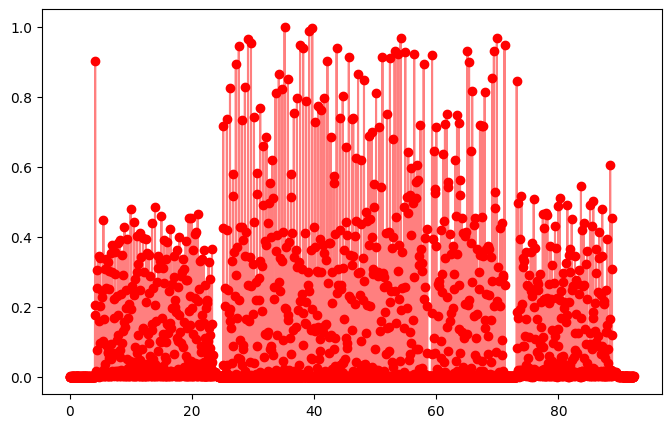

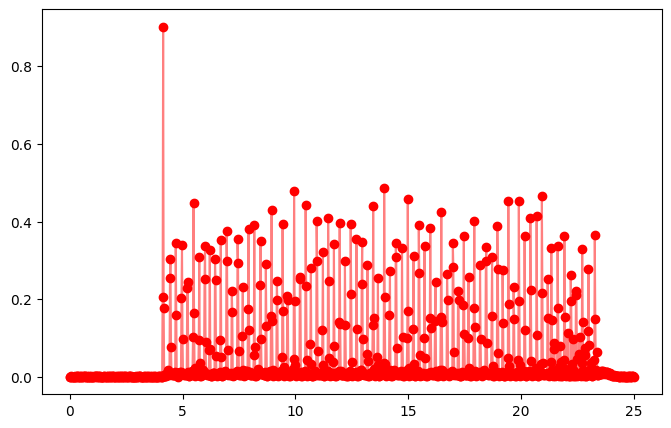

In [16]:
grafico(other_df)
grafico(other_df, time_start = 0, time_end = 25)


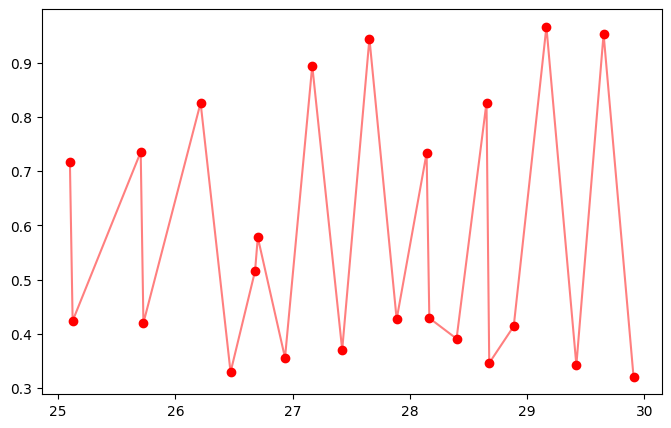

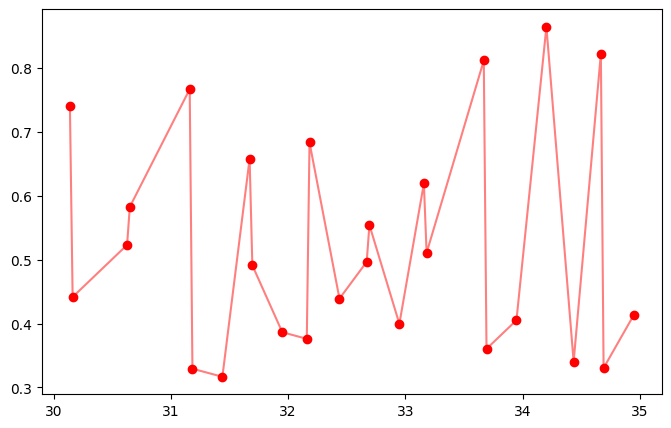

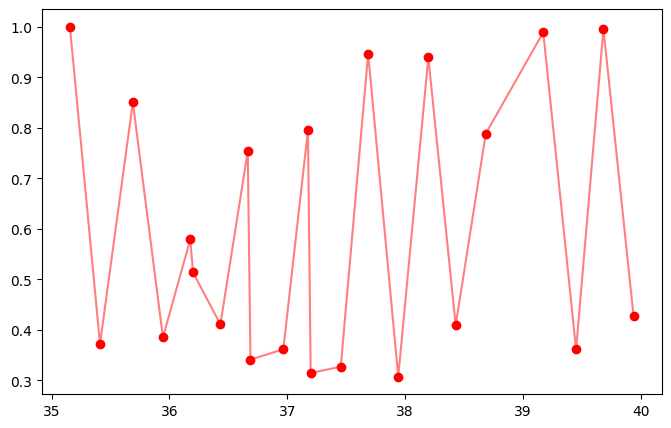

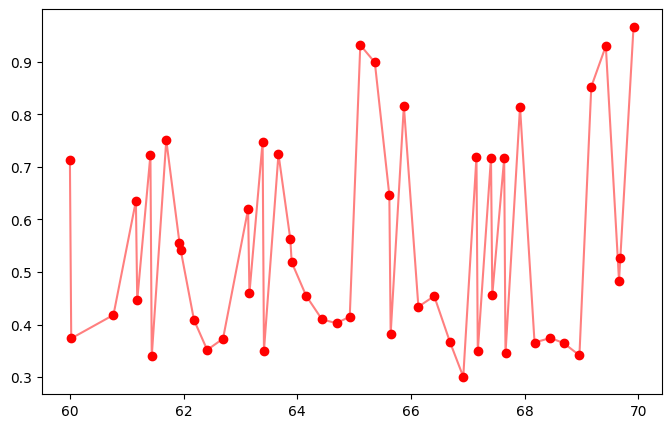

In [17]:
grafico(onset_df, time_start = 25, time_end = 30)
grafico(onset_df, time_start = 30, time_end = 35)
grafico(onset_df, time_start = 35, time_end = 40)
grafico(onset_df, time_start = 60, time_end = 70)

# Risultati

- Ho fatto dei grafigi a diversi tempi per visualizzare i risulati i graphici sembrano dimostrare che la tolleranza e' sbagliata immagino che la tolleranza giusta sia sopra `0.5` visto che ci sono chiarametne dei rumori piu' alti 

- un altra cosa che sembra accadere e che avolte i suoni vengono registrati piu' volte questo puo' facilmente essere aggiustato con una funzione che rimuove risultati molte piu vicini 


bonset_df = other_df[other_df['Onset Strength'] > 0.]

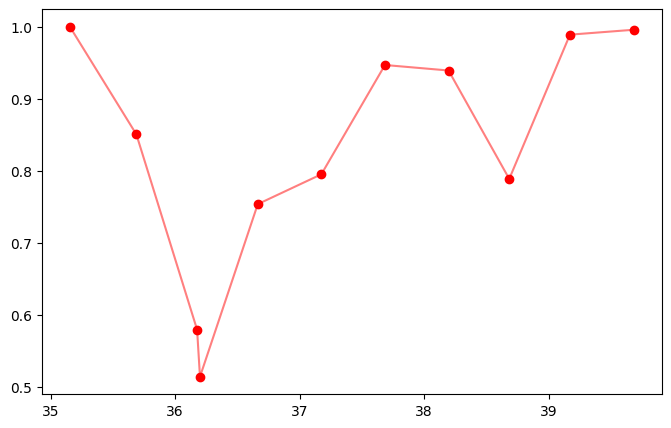

In [47]:
#  Rimuove i suoni meno forti di 0.5
nuovo_df = other_df[other_df['Onset Strength'] > 0.5]

# # Rimove i suoni che sono troppo vicini
# nuovo_df = nuovo_df[nuovo_df['Time Difference'] > 0.1]

grafico(nuovo_df, time_start = 35, time_end = 40)